## Do not import any other library

In [1]:
#Mehmet Enes Gümüş/ 150170047
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from checkers.checker import check_fft, check_ifft

## 1. Implement Recursive 1D FFT, 1D IFFT, 2D FFT, 2D IFFT (You can't use built-in function)

### Recursive 1D FFT 

In [2]:
import math
from math import e
def fft_1d(x):
    N = len(x)
    if N <= 1: 
        return x
    even_index = fft_1d(x[0::2])
    odd_index = fft_1d(x[1::2])
    make_array=[0]
    for i in range (N-1):
        make_array.append(0)
    a=int(N/2)
    for i in range(a):
        make_array[i] = even_index[i] + e**((-2j * np.pi * i) / N) * odd_index[i]
        make_array[i + a] = even_index[i] - e**((-2j * np.pi * i) / N) * odd_index[i]
    return make_array

In [3]:
x = np.random.random(1024)
np.allclose(fft_1d(x), np.fft.fft(x))   #for control

True

### Recursive 1D IFFT 

In [4]:
def ifft_1d(x):
    N = len(x)
    if N <= 1: 
        return x
    even_index = ifft_1d(x[0::2])
    odd_index = ifft_1d(x[1::2])
    make_array=[0]
    for i in range (N-1):
        make_array.append(0)
    a=int(N/2)
    for i in range(a):
        make_array[i] = (even_index[i] + e**((2j * np.pi * i) / N) * odd_index[i]) /2
        make_array[i + a] = (even_index[i] - e**((2j * np.pi * i) / N) * odd_index[i]) /2
    return make_array

In [5]:
x = np.random.random(1024)
np.allclose(ifft_1d(x), np.fft.ifft(x))

True

## 2D FFT

In [6]:
def fft_2d(x):
    rowN=len(x)
    colN=len(x[0])

    zet=0
    new_matrix= [[0 for x in range(rowN)] for y in range(colN)]
    for row in x:
        a=row
        b=fft_1d(a)
        for i in range(rowN):
            new_matrix[zet][i]=b[i]
        zet=zet+1
    
    for i in range(rowN):
        a=[]
        for j in range(colN):
            a.append(new_matrix[j][i])
        b=fft_1d(a)
        for h in range(rowN):
            new_matrix[h][i]=b[h]

    return new_matrix

## 2D IFFT

In [7]:
def ifft_2d(x):
    rowN=len(x)
    colN=len(x[0])

    zet=0
    new_matrix= [[0 for x in range(rowN)] for y in range(colN)]
    for row in x:
        a=row
        b=ifft_1d(a)
        for i in range(rowN):
            new_matrix[zet][i]=b[i]
        zet=zet+1
    
    for i in range(rowN):
        a=[]
        for j in range(colN):
            a.append(new_matrix[j][i])
        b=ifft_1d(a)
        for h in range(rowN):
            new_matrix[h][i]=b[h]
    return new_matrix

## Check your implementation

In [8]:
np.random.seed(1773)
test = np.random.rand(512, 512)

In [9]:
check_fft(fft_2d(test))

TESTING RECURSIVE FFT 2D
PASSED


In [10]:
check_ifft(ifft_2d(fft_2d(test)))

TESTING RECURSIVE IFFT 2D
PASSED


## 2. Read

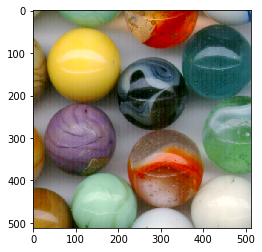

In [11]:
A = plt.imread('original.bmp')
plt.imshow(A)

# 3. Compress Image

For each channel **seperately**: <br />
> * Apply 2D FFT<br />
> * Keep the most contributing coefficients (90%).<br />
> * Apply 2D IFFT on kept coefficients. <br />

In [12]:
def compress(x):
    xFFT=fft_2d(x)
    reshaped=np.array(xFFT).reshape(-1)
    absxFFT=np.abs(reshaped)
    sortedxFFT=np.sort(absxFFT)
    throw= sortedxFFT[int(np.floor((1-0.9)*len(sortedxFFT)))]
    ind=np.abs(xFFT)>throw
    compressed=xFFT*ind
    return compressed


In [13]:
A_copy=A.copy()
blue=A_copy[ :, :, 0]
green=A_copy[ :, :, 1]
red=A_copy[ :, :, 2]
cmp_blue=compress(blue)
cmp_green=compress(green)
cmp_red=compress(red)

# 4. Reconstruct, Plot and Save

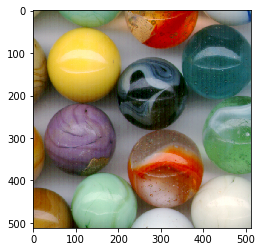

In [14]:
def reconstruct(x):
    Alow=ifft_2d(x)
    Alow=np.abs(Alow)
    return Alow

cmp_blue=reconstruct(cmp_blue)
cmp_green=reconstruct(cmp_green)
cmp_red=reconstruct(cmp_red)
A_copy[ :, :, 0]=cmp_blue
A_copy[ :, :, 1]=cmp_green
A_copy[ :, :, 2]=cmp_red
plt.imshow(A_copy)
from PIL import Image 
import PIL
img = Image.fromarray(A_copy, 'RGB')
img.save("compressed.png")
img.save("compressed.bmp")

# 5. Calculate Mean Square Error between original and compressed

In [15]:
def mean_sq_err(original, compressed):
    mse = np.square(np.subtract(original,compressed)).mean()
    return mse
mean_sq_err(A,A_copy)

0.48110071818033856

In [25]:
A  #original img

array([[[168, 166, 138],
        [171, 163, 132],
        [164, 159, 125],
        ...,
        [ 92, 145, 179],
        [111, 153, 181],
        [133, 160, 187]],

       [[165, 161, 132],
        [164, 158, 130],
        [162, 159, 130],
        ...,
        [ 86, 139, 174],
        [ 92, 146, 179],
        [123, 158, 182]],

       [[163, 158, 130],
        [163, 159, 130],
        [162, 155, 115],
        ...,
        [ 84, 130, 170],
        [ 92, 139, 172],
        [107, 147, 179]],

       ...,

       [[171, 128,  38],
        [172, 128,  31],
        [171, 121,  26],
        ...,
        [189, 189, 180],
        [186, 189, 180],
        [186, 186, 180]],

       [[172, 128,  38],
        [172, 128,  31],
        [171, 121,  26],
        ...,
        [186, 185, 177],
        [185, 189, 180],
        [184, 186, 180]],

       [[172, 130,  38],
        [172, 124,  38],
        [169, 121,  31],
        ...,
        [185, 186, 180],
        [184, 189, 180],
        [185, 185, 179]]

In [26]:
A_copy #compressed img

array([[[167, 165, 137],
        [170, 162, 131],
        [163, 159, 125],
        ...,
        [ 92, 144, 178],
        [110, 153, 181],
        [133, 159, 187]],

       [[165, 160, 132],
        [163, 157, 130],
        [162, 159, 129],
        ...,
        [ 86, 139, 174],
        [ 91, 146, 178],
        [123, 158, 181]],

       [[162, 158, 130],
        [163, 159, 129],
        [162, 154, 114],
        ...,
        [ 83, 129, 170],
        [ 92, 139, 171],
        [106, 146, 179]],

       ...,

       [[170, 127,  37],
        [172, 128,  30],
        [171, 121,  26],
        ...,
        [189, 188, 180],
        [185, 189, 179],
        [186, 186, 180]],

       [[171, 127,  38],
        [171, 128,  30],
        [170, 120,  25],
        ...,
        [185, 184, 177],
        [184, 188, 180],
        [184, 185, 179]],

       [[172, 130,  38],
        [171, 124,  37],
        [169, 120,  30],
        ...,
        [184, 186, 180],
        [184, 188, 179],
        [185, 185, 179]]

# 6. Comment

In [16]:
#In this project, i learned how to compute fft and inverse fft
#original image was 1mb
#compressed image is 768kb
#mean square error between original and mine image is 0.48
#i added original and compressed versions to the zip